In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [19]:
df = pd.read_csv('../outputs/mid001.csv')
df.head(10)

,machine_id,product_id,datetime,count
0,mid001,pid001,2022-01-01 00:00:00,0
1,mid001,pid001,2022-01-01 01:00:00,0
2,mid001,pid001,2022-01-01 02:00:00,0
3,mid001,pid001,2022-01-01 03:00:00,0
4,mid001,pid001,2022-01-01 04:00:00,0
5,mid001,pid001,2022-01-01 05:00:00,0
6,mid001,pid001,2022-01-01 06:00:00,0
7,mid001,pid001,2022-01-01 07:00:00,0
8,mid001,pid001,2022-01-01 08:00:00,1
9,mid001,pid001,2022-01-01 09:00:00,2


<Axes: xlabel='datetime', ylabel='count'>

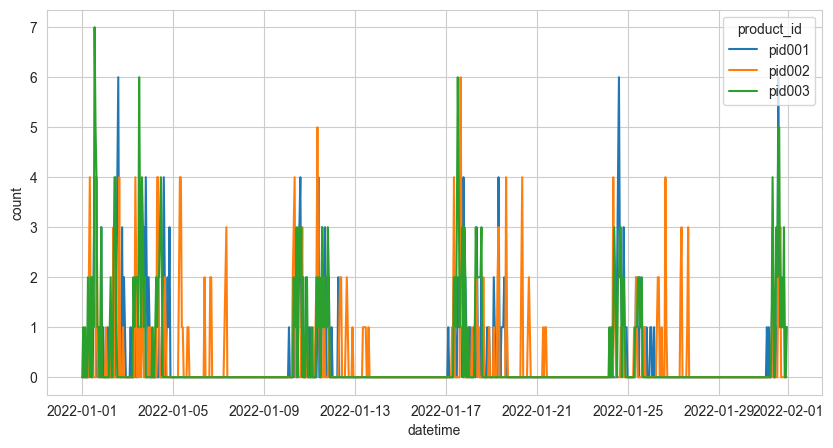

In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='datetime',
             y='count',
             hue='product_id',
             data=df[df['datetime'] < '2022-02-01'],
             ax=ax)

In [38]:
df['date'] = df['datetime'].dt.date
df_daily = df.groupby(['date', 'product_id'])['count'].sum().reset_index()

In [39]:
df_daily.head(20)

,date,product_id,count
0,2022-01-01,pid001,20
1,2022-01-01,pid002,12
2,2022-01-01,pid003,31
3,2022-01-02,pid001,22
4,2022-01-02,pid002,10
5,2022-01-02,pid003,14
6,2022-01-03,pid001,22
7,2022-01-03,pid002,12
8,2022-01-03,pid003,30
9,2022-01-04,pid001,16


<Axes: xlabel='date', ylabel='count'>

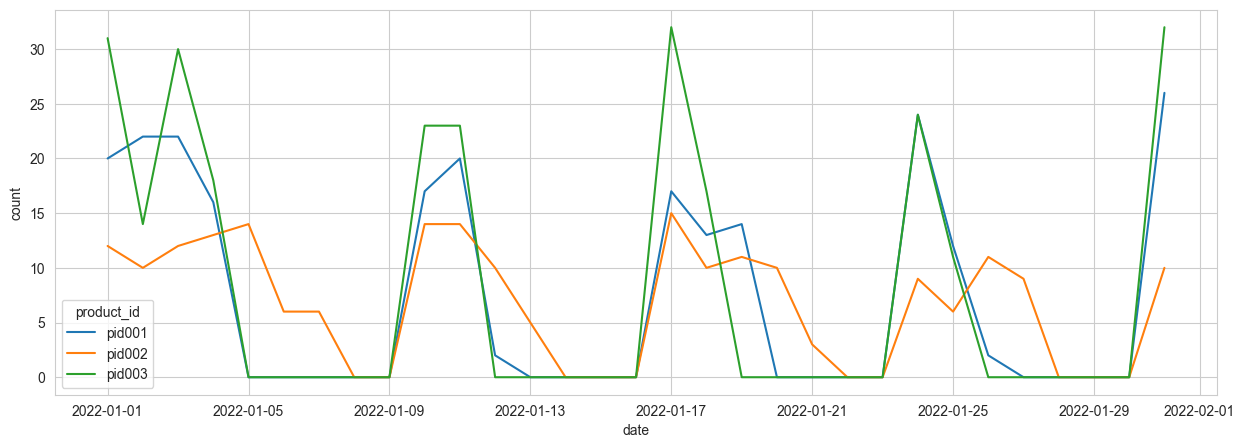

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x='date',
             y='count',
             hue='product_id',
             data=df_daily[df_daily['date'] < pd.to_datetime('2022-02-01').date()],
             ax=ax)